# Project: Predicting Stock Prices under Machine Learning Classification models

Course: Data Analysis Using Python

Group: Guoying Li

Date: June 7, 2019

Youtube URL: https://youtu.be/U7wFEvI-tLU


# Problem

Many events are unforeseen in stock markets and unforeseen events occur every day and are difficult to predict. 

With the rise of large scale datasets, it also becomes hard to observe patterns from large-scale time series data by eyes.

One of the problems we want to explore is about predicting whether stock price will close up or close down on the next trading day.


# Solution

On the positive side, we have more and more historical data which is helpful for us to explore and train these data sets. When the data becomes visualized,it is easier for people to read the data. Python has long been great for data munging and preparation, but pandas also for data analysis and modeling. Scikit-learn implement significant modeling functionality outside of linear and panel regression. Data mining skills can help people find patterns of prices well, and machine learning algorithm for prediction in the future. 

Our goal is to explore the patterns of stock prices with time series data under a selected model. First, we will make the comparison among four machine learning classification models (i.e 'linear','poly','rbf','sigmoid') and then select the appropriate one. After that, we will train the data with an appropriate model of the total four machine learning classification models during the prediction process. 

# Data

The full historical daily price and volume data for all US-based stocks and ETFs trading on the NYSE, NASDAQ, and NYSE MKT is provided from Kaggle. Thank you Boris Marjanovic (The account name of data provider in Kaggle). The data (last updated 11/10/2017) is presented in CSV format as follows: Date, Open, High, Low, Close, Volume, OpenInt. Note that prices have been adjusted for dividends and splits. 

# Structure of Jupyter Notebook
Step 1: Import the libraries

Step 2: Fetch Data

Step 3: Determine the target variable

Step 4: Creation of predictors variables

Step 5: Test and train dataset split

Step 6: Create the machine learning classification model using the train dataset

Step 7: Prediction

# Outcome & Analysis

In this project, our finding is that linear regression model is the more appropriate one among four models. There is one company without showing its prediction, which is Company 7, because of insufficient data. Otherwise, the model performs its prediction well in most of the companies. Based on the above plots, the more time series data we have, the more likely our prediction is to be accurate. 
    
It is worthy of being highlighted that the plot of Company 3 demonstrates there is a gap between test data and train data, which can be because the model not fit in this data set; It is also pointed out that in the plot of Company 5 the model predict the different direction of stock. In other words, when the historical data shows the decreasing trend of stock the model predict that the stock will close up. 

# Conclusion

"Everything that can be used to predict a company's future has already been used by investors and is 'baked into' today's price. Only unforeseen events will cause stock prices to change. And, unfortunately, unforeseen events -good and bad- happen every day." 

Further studies are needed in order to explore on methodology of stock price prediction. Although in this project, we select linear regression model as the more appropriate one among four machine learning classification models and also performs well in seven of the companies (ten companies in total), there are still some issues occurring which may be caused by insufficient training data, insufficient model and so on. Stock prices can be affected but not limited by market performance, company news and performance, industry performance, investor sentiment, and economic factors. We also need to learn how to see the economy working through its numbers, to understand the link between the statistic numbers and the real economy. 

# Step 1: Import the libraries

In this step, we will import the necessary libraries that will be needed to create the strategy.


In [1]:
# For data manipulation
import pandas as pd
import numpy as np

# Machine learning classification libraries
from sklearn import preprocessing, svm
# from sklearn.model_selection import cross_validate # predict the performance of a model 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# To plot
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

import time
import datetime
import math
style.use('ggplot')


# Step 2: Fetch Data

We will download the data from Kaggle. Based on the following formula, we have the data of Close, HL PCT (i.e. High-low Percentage) PCT Change (i.e price percentage change from open to close), and Volume. After that, we will drop the missing values from the data


In [2]:
# Reading CSV
df = pd.read_csv('aaap.us.txt', index_col=0)

df = df[['Open',  'High',  'Low',  'Close', 'Volume']]
df['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
df['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
df = df[['Close', 'HL_PCT', 'PCT_change', 'Volume']]

# We'll then drop any still NaN information from the dataframe:

df.dropna(inplace=True)
df.head()

,Close,HL_PCT,PCT_change,Volume
Date,,,,
2015-11-11,24.50,32.244898,32.432432,1584600
2015-11-12,25.00,18.480000,3.092784,83000
2015-11-13,25.26,6.532067,-0.824499,67300
2015-11-16,25.02,8.233413,0.039984,16900
2015-11-17,24.62,4.589764,0.654129,25900


# Step 3: Determine the target variable

The target variable is the variable which the machine learning classification algorithm will predict. In this example, the target variable is whether stock price will close up or close down on the next trading day

we define the forecasting column, then we fill any NaN data with -99999

We're saying we want to forecast out 1% of the entire length of the dataset. Thus, if our data is 100 days of stock prices, we want to be able to predict the price 1 day out into the future. If you are just trying to predict tomorrow's price, then you would just do 1 day out, and the forecast would be just one day out. If you predict 10 days out, we can actually generate a forcast for every day, for the next week and a half.

In our case, we've decided the features are a bunch of the current values, and the label shall be the price, in the future, where the future is 1% of the entire length of the dataset out. We'll assume all current columns are our features, so we'll add a new column with a simple pandas operation:

In [3]:
forecast_col = 'Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)
df.head()

,Close,HL_PCT,PCT_change,Volume,label
Date,,,,,
2015-11-11,24.50,32.244898,32.432432,1584600,25.90
2015-11-12,25.00,18.480000,3.092784,83000,25.20
2015-11-13,25.26,6.532067,-0.824499,67300,25.15
2015-11-16,25.02,8.233413,0.039984,16900,25.62
2015-11-17,24.62,4.589764,0.654129,25900,25.80


# Step 4: Creation of predictors variables

The X is a dataset that holds the predictor’s variables which are used to predict target variable, ‘y’. The X consists of the rest of feature variables. These can be understood as indicators based on which the algorithm will predict the option price.

In [4]:
# We'll then drop any still NaN information from the dataframe:
df.dropna(inplace=True)

#preprocessing
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
y = np.array(df['label'])

# Step 5: Test and train dataset split

In this step, we will split data into the train dataset and the test dataset.

1.First 80% of data is used for training and remaining data for testing

2.X_train and y_train are train dataset

3.X_test and y_test are test dataset


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Step 6: Create the machine learning classification models using the train dataset and make the comparisons

We will create the machine learning classification models based on the train dataset. Among the four models, we will select the appropriate one. This model will be later used to predict the trading signal in the test dataset.

In [6]:
# confidence among different kernels
for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k, gamma = 'scale')
    # we're "fitting" our training features and training labels.
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print(k,confidence)

linear 0.9668402164131926
poly 0.6784256976964596
rbf 0.5629617634002227
sigmoid 0.1862239295515934


# Step 7: Prediction

Since as we can see, the linear kernel performed the best, closely by rbf, then poly, then sigmoid was definitely needs to be kicked from the team. Let's use linear regression to make the prediction of stock price. After selecting linear regression model among four of models, we will predict whether stock prices of ten companies will close up or close down on the next trading day. 

We will predict the signal (buy or sell) for the test data set, using the clf.predict() function, and plot. We take all data, preprocess it, and then we split it up. Our X_lately variable contains the most recent features, which we're going to predict against. 


In [7]:
filenames = ['a.us.txt', 'aa.us.txt','aaap.us.txt', 'aaba.us.txt', 'aac.us.txt', 'zumz.us.txt', 'zvv.us.txt', 'zx.us.txt', 'zyme.us.txt', 'zyne.us.txt']

data = []
for filename in filenames:
    df = pd.read_csv(filename, sep=',',index_col = 0)
    label, _, _ = filename.split(sep='.')
    data.append(df)

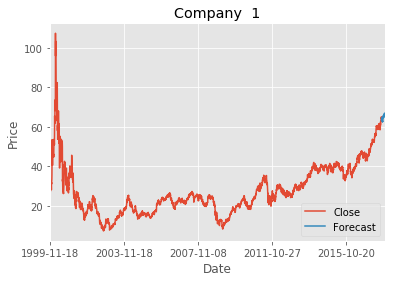

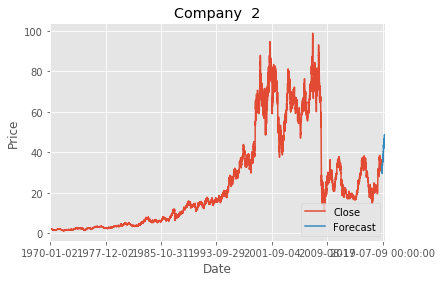

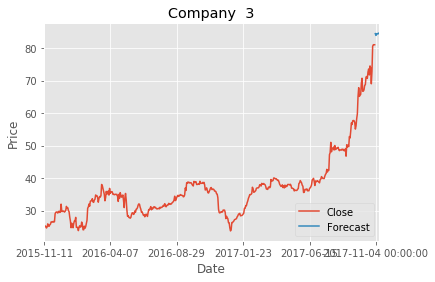

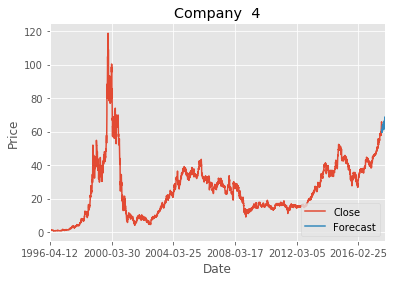

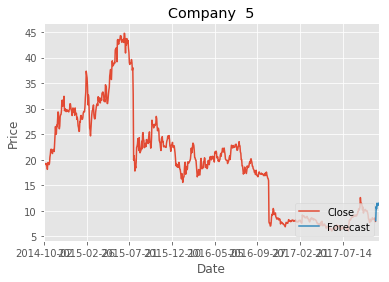

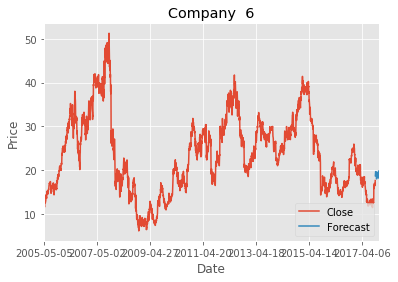

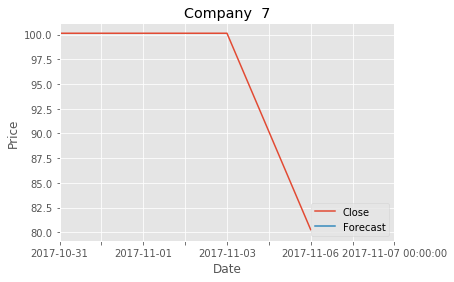

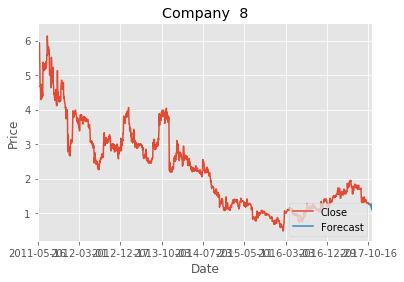

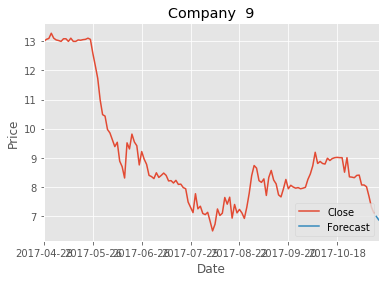

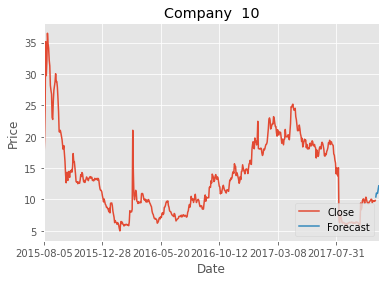

In [8]:
k=1
for df in data:
    df = df[['Open',  'High',  'Low',  'Close', 'Volume']]

    df['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
    df['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
    df = df[['Close', 'HL_PCT', 'PCT_change', 'Volume']]

    forecast_col = 'Close'
    df.fillna(value=-99999, inplace=True)
    forecast_out = int(math.ceil(0.01 * len(df)))
    df['label'] = df[forecast_col].shift(-forecast_out)

    X = np.array(df.drop(['label'], 1))
    X = preprocessing.scale(X)
    X_lately = X[-forecast_out:]
    X = X[:-forecast_out]

    df.dropna(inplace=True)

    y = np.array(df['label'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    clf = LinearRegression(n_jobs=-1)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    
    forecast_set = clf.predict(X_lately)
    df['Forecast'] = np.nan

    last_date = df.iloc[-1].name
    last_unix = time.mktime(datetime.datetime.strptime(last_date, "%Y-%m-%d").timetuple()) 
    one_day = 86400
    next_unix = last_unix + one_day
    
    for i in forecast_set:
        next_date = datetime.datetime.fromtimestamp(next_unix)
        next_unix += 86400
        df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]


    df['Close'].plot()
    df['Forecast'].plot()
    plt.title('Company  %i' %k)
    plt.legend(loc=4)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()
    # plt.savefig('Company  %i' %k)
    k=k+1